## Яндекс.Афиша

Задача: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

## План работы

- Шаг 1. Загрузить данные и подготовить их к анализу
- Шаг 2. Рассчитать метрики и построить графики
    - 2.1. Продуктовые метрики
    - 2.2. Метрики электронной коммерции
    - 2.3. Маркетинговые метрики
- Шаг 3. Сформулировать выводы и рекомендации

## Шаг 1. Загрузка данных и их подготовка к анализу

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
visits = pd.read_csv('/datasets/visits_log.csv') 
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [ ]:
visits.columns = visits.columns.str.replace(' ', '_').str.lower()
orders.columns = orders.columns.str.replace(' ', '_').str.lower()
costs.columns = costs.columns.str.replace(' ', '_').str.lower()

In [ ]:
visits.duplicated().sum()

0

In [ ]:
orders.duplicated().sum()

0

In [ ]:
costs.duplicated().sum()

0

In [ ]:
visits.isna().sum()

device                  0
end_ts                  0
source_id               0
start_ts                0
uid                     0
session_year            0
session_month           0
session_week            0
session_date            0
session_duration_sec    0
first_activity_date     0
activity_month          0
first_activity_month    0
cohort_lifetime         0
dtype: int64

In [ ]:
orders.isna().sum()

buy_ts             0
revenue            0
uid                0
first_buy_date     0
buy_month          0
first_buy_month    0
cohort_lifetime    0
dtype: int64

In [ ]:
costs.isna().sum()

source_id      0
dt             0
costs          0
costs_month    0
first_buy      0
dtype: int64

In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 14 columns):
device                  359400 non-null object
end_ts                  359400 non-null datetime64[ns]
source_id               359400 non-null int64
start_ts                359400 non-null datetime64[ns]
uid                     359400 non-null uint64
session_year            359400 non-null int64
session_month           359400 non-null int64
session_week            359400 non-null int64
session_date            359400 non-null datetime64[ns]
session_duration_sec    359400 non-null float64
first_activity_date     359400 non-null datetime64[ns]
activity_month          359400 non-null datetime64[ns]
first_activity_month    359400 non-null datetime64[ns]
cohort_lifetime         359400 non-null int64
dtypes: datetime64[ns](6), float64(1), int64(5), object(1), uint64(1)
memory usage: 51.1+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 7 columns):
buy_ts             50415 non-null datetime64[ns]
revenue            50415 non-null float64
uid                50415 non-null uint64
first_buy_date     50415 non-null datetime64[ns]
buy_month          50415 non-null datetime64[ns]
first_buy_month    50415 non-null datetime64[ns]
cohort_lifetime    50415 non-null int64
dtypes: datetime64[ns](4), float64(1), int64(1), uint64(1)
memory usage: 3.1 MB


In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 5 columns):
source_id      2542 non-null int64
dt             2542 non-null object
costs          2542 non-null float64
costs_month    2542 non-null datetime64[ns]
first_buy      2542 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 99.4+ KB


In [ ]:
visits.head(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,activity_month,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.0,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,28.0,2018-02-19,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.0,2018-03-09,2018-05-01,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,28.0,2018-03-09,2018-03-01,2018-03-01,0


In [ ]:
orders.head(5)

,buy_ts,revenue,uid,first_buy_date,buy_month,first_buy_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


In [ ]:
costs.head(5)

,source_id,dt,costs,costs_month,first_buy
0,1,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-01,2017-06-01


### Вывод

Названия столбцов были приведены к удобному формату, пропусков и дубликатов - нет. Датасеты готовы к дальнейшей обработке.

## Шаг 2. Считаем метрики и строим графики

### 2.1. Продуктовые метрики

#### 2.1.1. DAU, WAU и MAU. Средние значения этих метрик за весь период и график изменения метрик во времени;

In [ ]:
orders.revenue.sum() / orders.uid.count() #средний чек

4.999646930477041

In [ ]:
orders.groupby('uid').nunique().count()

buy_ts     36523
revenue    36523
uid        36523
dtype: int64

In [ ]:
orders.revenue.sum() / 36523 #cредняя выручка с одного клиента

6.9013279303452615

In [ ]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
# переводим начало сессии и конец сессии в дэйттайм

visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
# создаем столбцы для каждой сессии с годом, месяцем, неделей и датой

dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
# считаем dau, wau, mau

In [ ]:
dau_total
# количество уникальных пользователей в день

uid    907.991758
dtype: float64

In [ ]:
wau_total
# количество уникальных пользователей в неделю

uid    5716.245283
dtype: float64

In [ ]:
mau_total
# количество уникальных пользователей в месяц

uid    23228.416667
dtype: float64

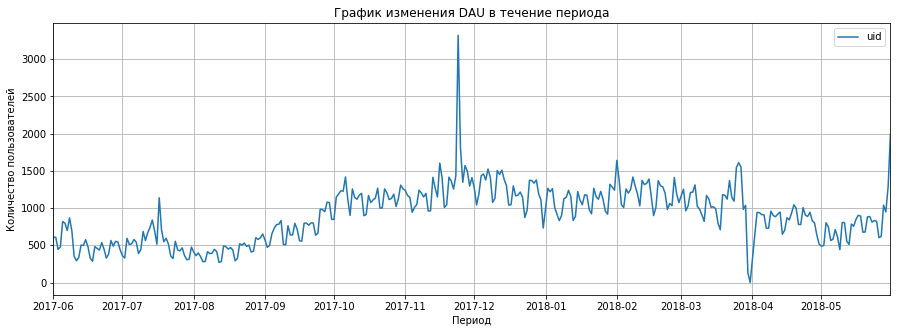

In [ ]:
dau_total2 = visits.groupby('session_date').agg({'uid': 'nunique'})
dau_total2.plot(figsize=[15,5], grid=True)
plt.title('График изменения DAU в течение периода')
plt.ylabel('Количество пользователей')
plt.xlabel('Период')
plt.show()

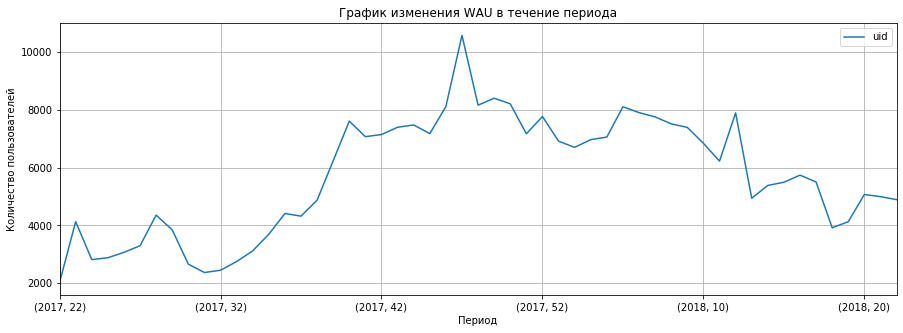

In [ ]:
wau_total2 = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
wau_total2.plot(figsize=[15,5], grid=True)
plt.title('График изменения WAU в течение периода')
plt.ylabel('Количество пользователей')
plt.xlabel('Период')
plt.show()

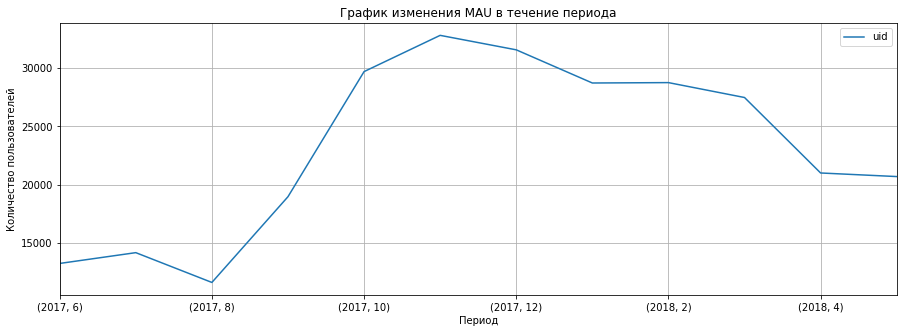

In [ ]:
mau_total2 = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau_total2.plot(figsize=[15,5], grid=True)
plt.title('График изменения MAU в течение периода')
plt.ylabel('Количество пользователей')
plt.xlabel('Период')
plt.show()

Средний чек = 5 у.е, средняя выручка с одного клиента = 6.9 у.е.

DAU = 907, WAU = 5716, MAU = 23228

Графики изменений DAU, WAU, MAU предельно похожи, имеют одинаковые пики. Аномальных значений почти не наблюдается. Обратить внимание можно разве что на ноябрь 2017-го. На всех трех графиках заметен существенный рост показателей. Наиболее явно в DAU. Если посмотреть показатель за каждый день ноября, то можно обнаружить резкое увеличение количества уникальных посещений в день 24-го ноября - это черная пятница, видимо в этот день в сервисе действовала какая-то акция.

Пока что нет полезной информации, отправляемся дальше...

#### 2.1.2. Сколько раз за день пользователи в среднем заходят на сайт. Как изменяется эта метрика с течением времени;

In [ ]:
sessions_per_user = visits.groupby(['session_year', 'session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user.sort_values(by='sessions_per_user', ascending=False).head(1)
# считаем количество сессий на одного человека в разрезе дат

,,n_sessions,n_users,sessions_per_user
session_year,session_date,,,
2017,2017-11-24,4042,3319,1.217837


In [ ]:
sessions_per_user['sessions_per_user'].mean()
# считаем среднее значение количества сессий на одного человека за весь период

1.082169644003972

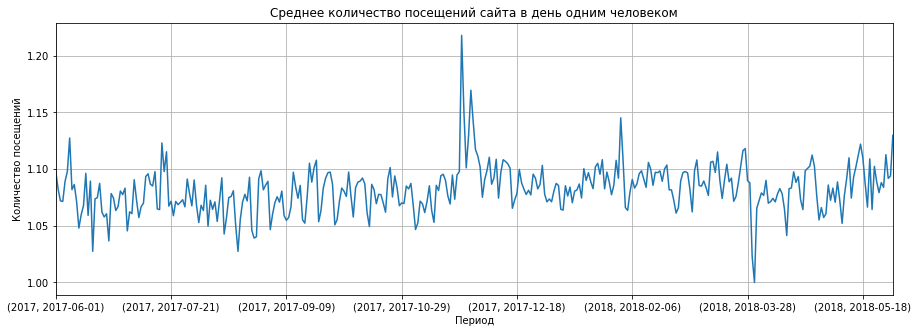

In [ ]:
sessions_per_user['sessions_per_user'].plot(figsize=[15,5], grid=True)
plt.title('Среднее количество посещений сайта в день одним человеком')
plt.ylabel('Количество посещений')
plt.xlabel('Период')
plt.show()
# аномально высокий показатель пришелся на 24 ноября, это черная пятница + возможно запустили таргет по аудитории ретаргета

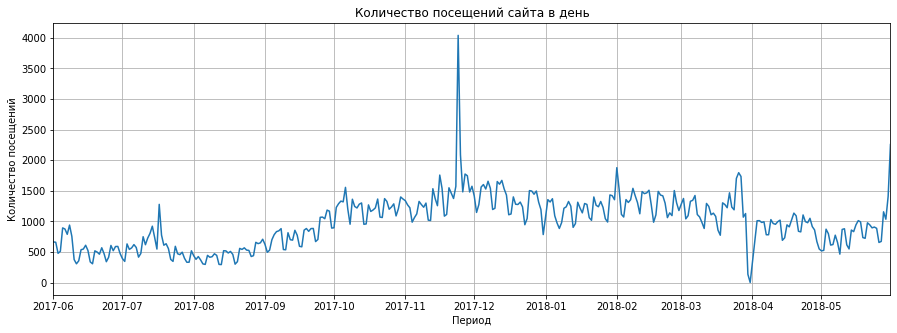

In [ ]:
visits_per_day = visits.groupby('session_date')['uid'].count()
visits_per_day.plot(figsize=[15,5], grid=True)
plt.title('Количество посещений сайта в день')
plt.ylabel('Количество посещений')
plt.xlabel('Период')
plt.show()

In [ ]:
testik = visits.groupby('uid')['start_ts'].count().reset_index()
testik.start_ts.mean()

1.5751482453795214

В среднем один пользователь в один день посещает сайт 1.08 раз. На протяжении всего период это значение дерижтся в одном диапозоне 1.05 - 1.10.

При этом среднее количество посещений на одного пользователя равно 1.57.

Количество посещений в стуки 987. Вероятно есть небольшая сезонная зависимость, что можно увидеть по графику, однако период за который у нас доступны данные - не позволяют об этом говорить точно.

#### 2.1.3. Сколько времени пользователи проводят на сайте. Средняя продолжительность пользовательской сессии за весь период. Как продолжительность сессий распределена по пользователям;

In [ ]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'] = visits['session_duration_sec']
session_duration_sec = visits['session_duration_sec'].mean()
session_duration_sec.round(2)
# считаем среднюю продолжительность сессии на одного человека

643.51

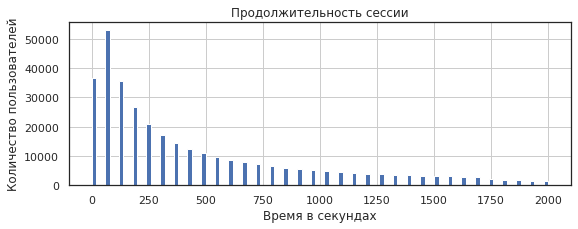

In [ ]:
visits['session_duration_sec'].hist(bins=100,range=[0,2000], figsize=[9,3],)
plt.title('Продолжительность сессии')
plt.ylabel('Количество пользователей')
plt.xlabel('Время в секундах')
plt.show()
# распределение продолжительности сессий

In [ ]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

In [ ]:
visits_duration = visits[['uid','start_ts','session_duration_sec']]

In [ ]:
buy_time = orders.groupby('uid').agg({'buy_ts': 'first'})

visits_duration_buyers = visits_duration.merge(buy_time, on='uid', how='right')

testik2 = visits_duration_buyers.session_duration_sec.mean()
testik2.round()

950.0

In [ ]:
visits_duration_buyers.session_duration_sec.median()

540.0

In [ ]:
visits['session_duration_sec'].median()

300.0

In [ ]:
visits_duration_buyers.session_duration_sec.mode()

0    60
dtype: int64

In [ ]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

In [ ]:
visits.groupby('session_duration_sec')['uid'].agg('count').sort_values(ascending=False).head(15)

session_duration_sec
60     53029
0      35794
120    35748
180    26672
240    21085
300    17005
360    14316
420    12301
480    10973
540     9722
600     8492
660     7830
720     7104
780     6552
840     5894
Name: uid, dtype: int64

In [ ]:
visits_duration_buyers.groupby('session_duration_sec')['uid'].agg('count').sort_values(ascending=False).head(15)

session_duration_sec
60     8787
120    7079
180    5879
0      5653
240    5155
300    4420
360    3854
420    3499
480    3256
540    2975
600    2597
660    2438
720    2212
780    2140
840    1939
Name: uid, dtype: int64

Средняя продлжительность сессии составляет 643 секунды. Однако средняя продолжительность сессии у тех, кто совершил хотя бы одну покупку - этот показатель значительно выше и составляется 950 секунд. Если посмотрем на медиану, то разница тоже будет существенной: 300 против 540 секунд. Можно сделать вывод, что продолжительность сессии влияет на покупку товара клиентом.

#### 2.1.4. Рассчитать Retention Rate, применяя когортный анализ.

In [ ]:
first_activity_date = visits.groupby(['uid'])['session_date'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.merge(first_activity_date, on='uid') 
# определяем дату первой активности для каждого пользователя

visits['session_date'] = pd.to_datetime(visits['session_date'])
visits['first_activity_date'] = pd.to_datetime(visits['first_activity_date'])
# переводим session_date в дэйттайм и переводим first_activity_date в дэйттайм

visits['activity_month'] = visits['session_date'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
# создаем столбцы с месяцем активности и с первым месяцем активности

visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 
# создаем стобец c продолжительностью жизни когорты, из месяца активности вычитаем первый месяц активности 

cohorts = visits.groupby(['first_activity_month','cohort_lifetime', 'device']).agg({'uid':'nunique'}).reset_index() 
# создаем датасет с когортами

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid', 'device']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
# создаем датасет с количеством юзеров в каждой кагорте и переименовываем uid в cohort_users для дальейшего мёрджа

cohorts = cohorts.merge(initial_users_count,on=['first_activity_month', 'device'])
# мерджем когорты с кол-вом уников по месяцу первой активности

cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 
# считаем retention rate, деля кол-во юзеров на общее кол-во юзеров в рамках данной кагорты

retention_pivot = cohorts.pivot_table(index=['first_activity_month','device'],columns='cohort_lifetime',values='retention',aggfunc='sum')
# создаем пивотник для retention rate

retention_pivot_desk = cohorts.query('device == "desktop"').pivot_table(index=['first_activity_month','device'],
                                            columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot_touch = cohorts.query('device == "touch"').pivot_table(index=['first_activity_month','device'],
                                             columns='cohort_lifetime',values='retention',aggfunc='sum')

# создаем два пивотника для retention rate в разрезе дейвайсов

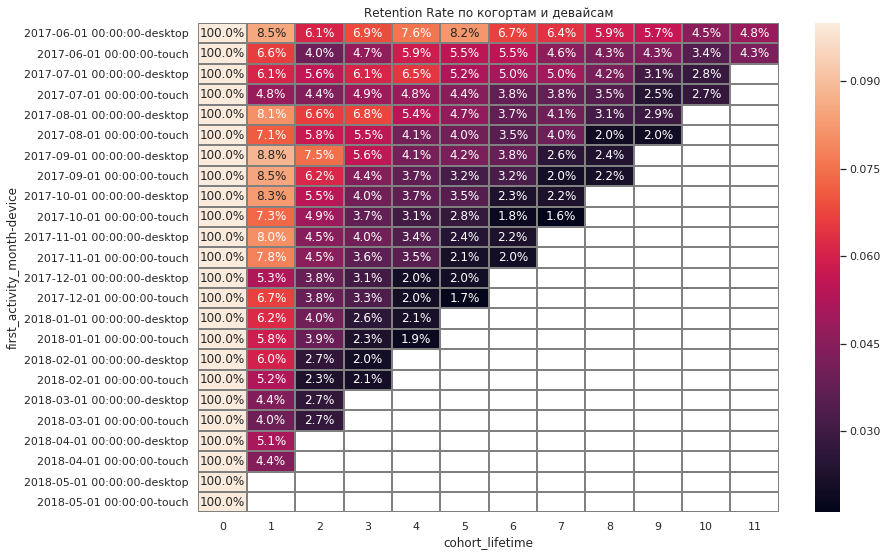

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate по когортам и девайсам')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',
           vmax=0.1);

In [ ]:
#sns.set(style='white')
#plt.figure(figsize=(13, 9))
#plt.title('Retention Rate по когортам и девайсам')
#sns.heatmap(retention_pivot_desk, annot=True, fmt='.1%', linewidths=1, linecolor='gray',
           #vmax=0.1);

In [ ]:
#sns.set(style='white')
#plt.figure(figsize=(13, 9))
#plt.title('Retention Rate по когортам и девайсам')
#sns.heatmap(retention_pivot_touch, annot=True, fmt='.1%', linewidths=1, linecolor='gray',
           #vmax=0.1);

Можно выделить следующие моменты: 

- RR на декстопных устройствах в среднем выше, чем на смартфонах/планшетах
- Заметная явная негативная динамика. В каждой новой когорте показатели RR доходят до отмеки ниже 5% быстрее и быстрее. Так если первые когорты продерживались хотя бы 4-5 месяцев, то последние когорты едва ли продерживаются больше месяца.
- Первые три когорты наиболее "живучие", даже на 7-ой месяц они показывают лучше результаты, чем все остальные когорты уже к 3 месяцу.

#### 2.1.5. Считаем распределение посетителей и покупателей по устройствам

In [ ]:
visits_time = visits[['start_ts', 'uid', 'source_id', 'device']]
buy_time = orders.groupby('uid').agg({'buy_ts': 'first'})
test = visits_time.merge(buy_time, on='uid', how='right')
test['start_ts'] = pd.to_datetime(test['start_ts'])
test['buy_ts'] = pd.to_datetime(test['buy_ts'])

test2 = test.query('start_ts <= buy_ts')
# оставляем только тех, кто заходил на сайт до совершения первой покупки

test3 = test2.groupby(['uid','device'])['buy_ts'].agg('count').reset_index()

buyers_device = test3.groupby('device')['uid'].count().reset_index()
buyers_device
# получаем распределение покупок по устройствам

In [ ]:
(7790/(7790 + 30104)) * 100
# доля покупок с мобильных устройств

20.557344170581093

In [ ]:
test5 = visits.groupby(['uid','device'])['start_ts'].agg('count').reset_index()

visiters_device = test5.groupby('device')['start_ts'].agg('count').reset_index()
visiters_device
# получаем распределение посещений по устройствам

In [ ]:
(71345/(71345 + 164523)) * 100
# доля посещений с мобильных устройств

Видим, что среди покупателей доля использовавших мобильное устройство меньше, чем доля использовавших мобильное устройство просто при посещении сайта. 20% против 30%. 

### 2.2. Метрики электронной коммерции

#### 2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;

In [ ]:
first_orders = visits.groupby('uid')['start_ts'].agg({'start_ts': 'min'})
first_orders = first_orders.reset_index()
first_orders.head(1)
len(first_orders)
# создаем датасет с датой первого визита

228169

In [ ]:
first_buys = orders.groupby('uid')['buy_ts'].agg({'buy_ts': 'min'})
first_buys = first_buys.reset_index()
first_buys.head(1)
len(first_buys)
#создаем датасет с датой первой покупки

36523

In [ ]:
dd2 = first_orders.merge(first_buys, on='uid')
dd2.head(1)
len(dd2)
# Мерджим дату первого визита и дату первой покупки по UID

36523

In [ ]:
dd3 = first_orders.merge(first_buys, on='uid')
dd3['buy_ts'] = pd.to_datetime(dd3['buy_ts'])
dd3['start_ts'] = pd.to_datetime(dd3['start_ts'])
dd3['pass_time'] = dd3['buy_ts'] - dd3['start_ts']
# Вычитаем дату первого визит из даты первой покупки

In [ ]:
dd3['pass_time'] = dd3['pass_time'] / np.timedelta64(1, 'm')
dd3['pass_time'].mean().round(1)
# Получаем среднее время между первым визитом и покупкой в минутах

24340.2

In [ ]:
dd3['pass_time'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: pass_time, dtype: float64

In [ ]:
cut = dd3.query('pass_time < 3000 and pass_time > 1')

In [ ]:
cut['pass_time'].describe()

count    22353.000000
mean       195.641033
std        516.366714
min          2.000000
25%          5.000000
50%         12.000000
75%         43.000000
max       2997.000000
Name: pass_time, dtype: float64

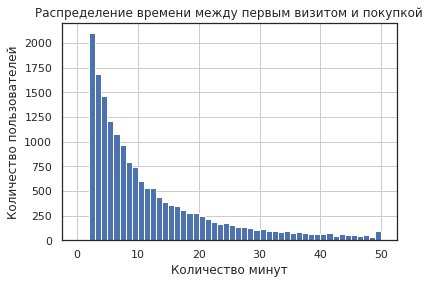

In [ ]:
cut['pass_time'].hist(bins=50, range=[0,50])
plt.title('Распределение времени между первым визитом и покупкой')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество минут')
plt.show()

In [ ]:
cut['pass_time'].mean()

195.64103252359862

In [ ]:
cut['pass_time'].median()

12.0

In [ ]:
cut['pass_time'].mode()

0    2.0
dtype: float64

In [ ]:
cut.groupby('pass_time')['uid'].agg('count').reset_index().head(15)
# на всякий случай проверил

,pass_time,uid
0,2.0,2098
1,3.0,1685
2,4.0,1460
3,5.0,1204
4,6.0,1077
5,7.0,970
6,8.0,793
7,9.0,742
8,10.0,596
9,11.0,531


В среднем с первого посещения сайта до совершения покупки проходит порядка 195 минут. При этом медианное значение = 12 минутам. А вот мода и вовсе равна 2 минутам. Будем ориентироваться по ней.

#### 2.2.2. Применяя когортный анализ, рассчитать среднее количество покупок на одного клиента за определённый период, например за 6 месяцев;

In [ ]:
buy = orders.groupby('uid').agg({'buy_ts':'count'}).reset_index() 
# Создаем датасет с количество покупок по каждому UID

buy['buy_ts'].mean().round(2)
# Среднее количество покупок на одного клиента за весь период

first_buy_date = orders.groupby(['uid'])['buy_ts'].min().reset_index()

first_buy_date = orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_buy_date.name = 'first_buy_date'
first_buy_date = first_buy_date.rename(columns={'buy_ts':'first_buy_date'}) 
orders = orders.merge(first_buy_date, on='uid')
# Определяем первую дату покупки и добавляем ее в датасет orders

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders['first_buy_date'] = pd.to_datetime(orders['first_buy_date'])
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_buy_month'] = orders['first_buy_date'].astype('datetime64[M]')
# переводим значения в дэйттайм и к месяцам

orders['cohort_lifetime'] = orders['buy_month'] - orders['first_buy_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int') 
# Считаем возраст когорт

cohorts_buy = orders.groupby(['first_buy_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
# Создаем датасет с когортами

initial_buy_count = cohorts_buy[cohorts_buy['cohort_lifetime'] == 0][['first_buy_month','uid']]
initial_buy_count = initial_buy_count.rename(columns={'uid':'cohort_users'}) 
cohorts_buy = cohorts_buy.merge(initial_buy_count,on='first_buy_month')
cohorts_buy['count_of_buy_per_user'] = cohorts_buy['uid']/cohorts_buy['cohort_users'] 
cohorts_buy.head(1)
# Добавляем столбец со средним кол-вом покупок на одного пользователя по когортам

buy_pivot = cohorts_buy.pivot_table(index='first_buy_month',columns='cohort_lifetime', values='count_of_buy_per_user', aggfunc='sum') 

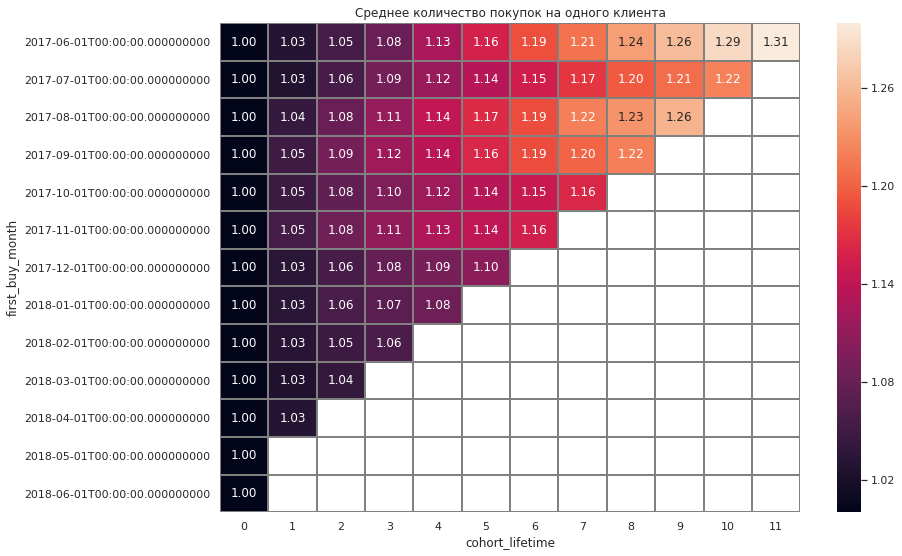

In [ ]:
buy_pivot_sum = buy_pivot.cumsum(axis = 1)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Среднее количество покупок на одного клиента')
sns.heatmap(buy_pivot_sum, annot=True, fmt='.2f', linewidths=1, linecolor='gray',
           vmax=1.3);

In [ ]:
buy_pivot.cumsum(axis=1).mean(axis=0) 
# Среднее количество покупок на одного юзера за период времени

cohort_lifetime
0     1.000000
1     1.036998
2     1.064661
3     1.090912
4     1.117959
5     1.143277
6     1.170525
7     1.194395
8     1.222413
9     1.242223
10    1.253114
11    1.311419
dtype: float64

В среднем за 6 месяцев на одного клиента приходится 1.17 покупки.

#### 2.2.3. Рассчитать среднюю выручку с пользователя. Как меняется эта метрика с течением времени;

In [ ]:
cohorts_revenue = orders.groupby(['first_buy_month','cohort_lifetime']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index() 
# создаем датасет с выручкой по месяцам и когортам

In [ ]:
initial_revenue_count = cohorts_revenue[cohorts_revenue['cohort_lifetime'] == 0][['first_buy_month','uid']]
initial_revenue_count = initial_revenue_count.rename(columns={'uid':'cohort_users'}) 
cohorts_revenue = cohorts_revenue.merge(initial_revenue_count,on='first_buy_month')
cohorts_revenue['mean'] = cohorts_revenue['revenue']/cohorts_revenue['cohort_users'] 

In [ ]:
revenue_pivot = cohorts_revenue.pivot_table(index='first_buy_month',columns='cohort_lifetime', values='mean', aggfunc='sum') 

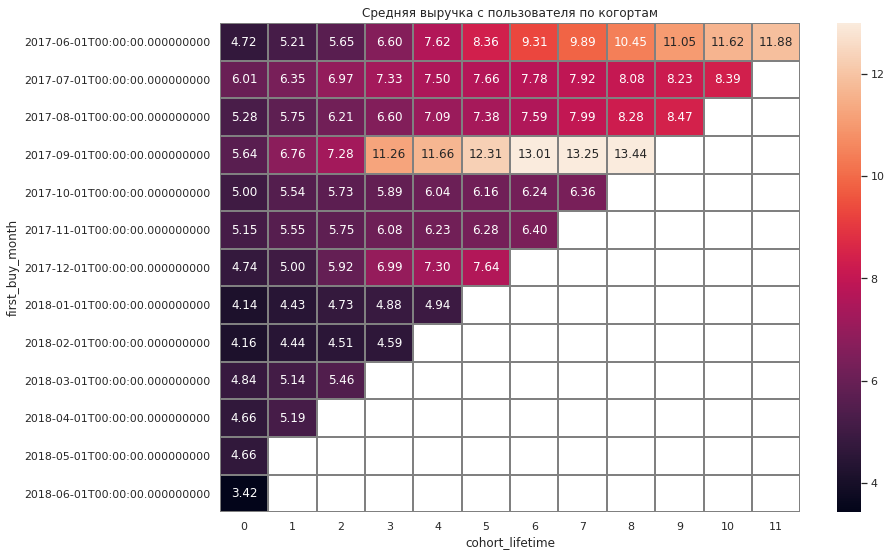

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Средняя выручка с пользователя по когортам')
sns.heatmap(revenue_pivot.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='gray',
           vmax=13);

In [ ]:
revenue_pivot.cumsum(axis=1).mean(axis=0)

cohort_lifetime
0      4.801682
1      5.395666
2      5.821811
3      6.689763
4      7.298634
5      7.969053
6      8.387686
7      9.083583
8     10.062084
9      9.251340
10    10.004616
11    11.879234
dtype: float64

In [ ]:
orders.revenue.sum() / 36523
#cредняя выручка с одного пользователя

6.901327930345262

Средняя выручка с одного пользователя равны 6.9 у.е. В среднем такую выручку приносит пользователь к 3-4 месяцу после первой покупки. 

#### 2.2.4. Как меняется во времени накопительный LTV по когортам. Средний LTV по когортам за 6 месяцев. Маржинальность сервиса — 100%.

In [ ]:
# определяем источник пользователя
sources = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first', 'device':'first'})
# соединяем первые покупки и источники 
payers = orders.groupby('uid').agg({'buy_ts': 'min'}).merge(sources, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})

ltv = payers.merge(orders, on = 'uid')
ltv_source = payers.merge(orders, on = 'uid')
ltv_device = payers.merge(orders, on = 'uid')

In [ ]:
# считаем LTV по девайсам
ltv_device['buy_ts'] = pd.to_datetime(ltv_device['buy_ts'])
ltv_device['first_buy'] = pd.to_datetime(ltv_device['first_buy'])
ltv_device['lifetime'] = ((ltv_device['buy_ts'] - ltv_device['first_buy']) / np.timedelta64(1, 'M')).round().astype(int)
ltv_device = ltv_device.pivot_table(index = 'device', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv_device = ltv_device.cumsum(axis = 1)
cohort_sizes_device = payers.groupby('device').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})
ltv_device = ltv_device.merge(cohort_sizes_device, on = 'device')
ltv_device = ltv_device.div(ltv_device['cohort_size'], axis = 0).drop(columns = 'cohort_size')

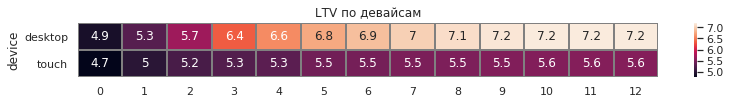

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 1))
plt.title('LTV по девайсам')
sns.heatmap(ltv_device, annot=True, linewidths=1, linecolor='gray',
           vmax=7.2);

In [ ]:
ltv_device.mean(axis=1)

device
desktop    6.581409
touch      5.371131
dtype: float64

In [ ]:
# считаем LTV по источникам
ltv_source['buy_ts'] = pd.to_datetime(ltv_source['buy_ts'])
ltv_source['first_buy'] = pd.to_datetime(ltv_source['first_buy'])
ltv_source['lifetime'] = ((ltv_source['buy_ts'] - ltv_source['first_buy']) / np.timedelta64(1, 'M')).round().astype(int)
ltv_source = ltv_source.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv_source = ltv_source.cumsum(axis = 1)
cohort_sizes_source = payers.groupby('source_id').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})
ltv_source = ltv_source.merge(cohort_sizes_source, on = 'source_id')
ltv_source = ltv_source.div(ltv_source['cohort_size'], axis = 0).drop(columns = 'cohort_size')

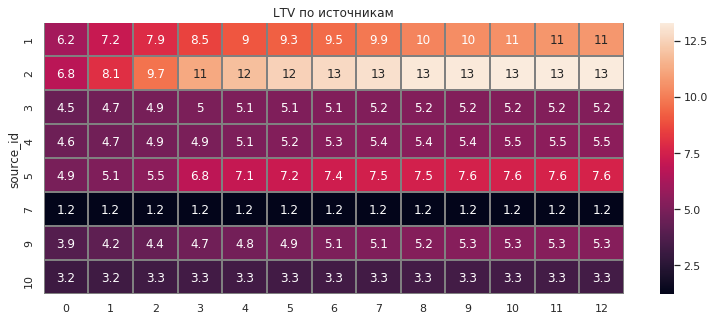

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 5))
plt.title('LTV по источникам')
sns.heatmap(ltv_source, annot=True, linewidths=1, linecolor='gray',
           vmax=13.3);

In [ ]:
ltv_source.mean(axis=1)

source_id
1      9.231290
2     11.720565
3      5.046809
4      5.194260
5      6.871468
7      1.220000
9      4.881140
10     3.307793
dtype: float64

In [ ]:
# считаем LTV по когортам
ltv['buy_ts'] = pd.to_datetime(ltv['buy_ts'])
ltv['first_buy'] = pd.to_datetime(ltv['first_buy'])
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1, 'M')).round().astype(int)
ltv['first_buy'] = ltv['first_buy'].astype('datetime64[M]')
ltv = ltv.pivot_table(index = 'first_buy', columns = 'lifetime', values = 'revenue', aggfunc = 'sum') #.fillna(0)
ltv = ltv.cumsum(axis = 1)
payers['first_buy'] = payers['first_buy'].astype('datetime64[M]')
cohort_sizes = payers.groupby('first_buy').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})
ltv = ltv.merge(cohort_sizes, on = 'first_buy')
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = 'cohort_size')

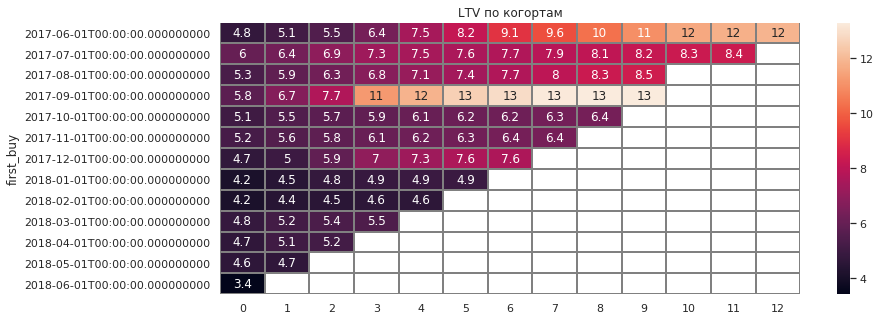

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 5))
plt.title('LTV по когортам')
sns.heatmap(ltv, annot=True, linewidths=1, linecolor='gray',
           vmax=13.3);

In [ ]:
ltv.mean(axis=1)

first_buy
2017-06-01     8.675877
2017-07-01     7.531771
2017-08-01     7.138879
2017-09-01    10.880003
2017-10-01     5.929663
2017-11-01     5.995122
2017-12-01     6.451339
2018-01-01     4.691636
2018-02-01     4.456702
2018-03-01     5.204182
2018-04-01     4.990970
2018-05-01     4.647266
2018-06-01     3.420000
dtype: float64

GP не считаем, так как маржинальность по условиям равна 100%, а значит GP = Revenue

- LTV у пользователей десктопных устройств заметно выше, нежели у мобильных устройств. Средний LTV 6.5 против 5.3
- Наиболее эффективные источники трафика: 2 (11.7 LTV), 1 (9.2 LTV) и 5 (6.8 LTV). Все остальные источники сильно уступают.
- Наибольший показатель LTV у первых четырех когорт. При этом 4-ая (сентябрьская) - лидирует с солидным отрывом. 


### 2.3. Маркетинговые метрики

#### 2.3.1. Посчитать общую сумму расходов на маркетинг. Как траты распределены по источникам и как меняется это распределение во времени;

In [ ]:
costs['costs'].sum()
# Сумма затрат на рекламу

329131.62

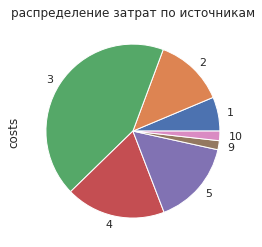

In [ ]:
costs.groupby('source_id')['costs'].sum().plot(kind='pie')
plt.title('распределение затрат по источникам')
plt.show()
# Сумма затрат на рекламу в разрезе источников

In [ ]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
# Переводим в дэйттайм

In [ ]:
costs_pivot = costs.pivot_table(
        index='source_id', 
        columns='costs_month', 
        values='costs', 
        aggfunc='sum').round(0)

# Создаем сводную таблицу, в которой суммируются расходы на рекламу в разрезе истоничков и периодов

In [ ]:
costs_pivot.sum(axis=1).sort_values(ascending=False)

source_id
3     141323.0
4      61073.0
5      51757.0
2      42806.0
1      20833.0
10      5822.0
9       5517.0
dtype: float64

In [ ]:
costs_pivot.mean(axis=0).sort_values(ascending=False)

costs_month
2017-12-01    5473.714286
2017-11-01    5415.285714
2017-10-01    5188.857143
2018-01-01    4788.428571
2018-02-01    4674.714286
2018-03-01    4345.000000
2017-09-01    3481.428571
2018-04-01    3184.000000
2018-05-01    3174.857143
2017-07-01    2605.857143
2017-06-01    2573.571429
2017-08-01    2113.000000
dtype: float64

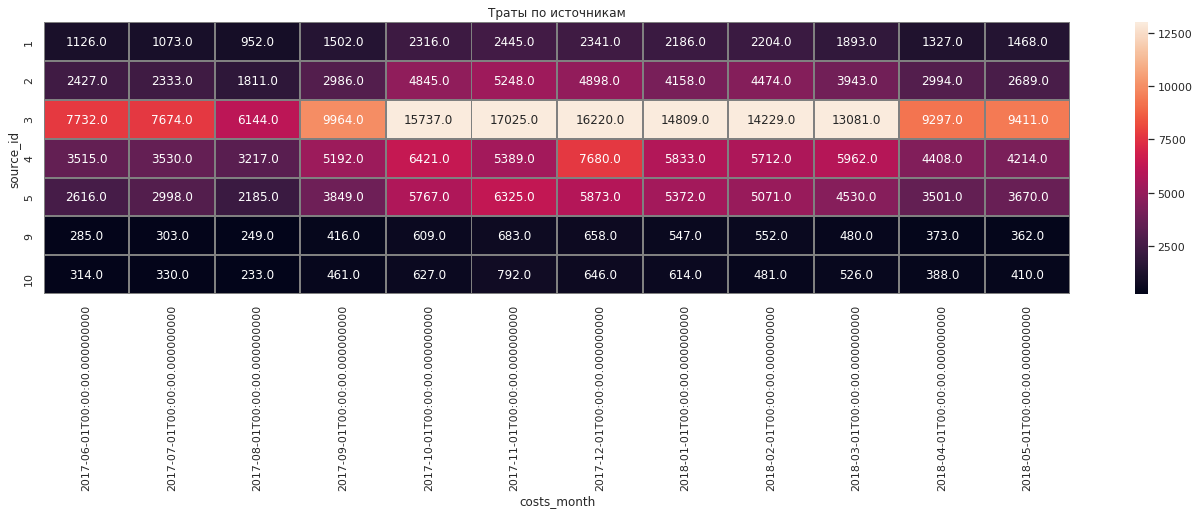

In [ ]:
sns.set(style='white')
plt.figure(figsize=(23, 5))
plt.title('Траты по источникам')
sns.heatmap(costs_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray',
           vmax=13000);

- Наибольшие траты приходятся на 3 источник трафика. Далее следуют 4, 5 и 2 источники. На все остальные расходуется существенно меньше.
- Наибольие траты приходятся на декабрь, ноябрь и октябрь. Меньше всего расходуется рекламного бюджета в летние месяцы.

#### 2.3.2. Рассчитать CAC. Сколько стоит привлечение одного покупателя из каждого источника трафика;

In [ ]:
# считаем CAC по источникам
cac_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
cac_source = cac_source.merge(cohort_sizes_source.reset_index(), on = 'source_id') #left_on = 'source_id', right_on='Source Id'
cac_source['cac'] = cac_source['costs'] / cac_source['cohort_size']
cac_source = cac_source.set_index('source_id')
cac_source.sort_values(ascending=False, by='cac')

,costs,cohort_size,cac
source_id,,,
3,141321.63,10473,13.493901
2,42806.04,3506,12.209367
5,51757.10,6931,7.467479
1,20833.27,2899,7.186364
4,61073.60,10296,5.931779
9,5517.49,1088,5.071222
10,5822.49,1329,4.381106


In [ ]:
# считаем CAC по когортам
costs['first_buy'] = costs['dt'].astype('datetime64[M]')
cac = costs.groupby('first_buy').agg({'costs': 'sum'}).reset_index()
cac = cac.merge(cohort_sizes.reset_index(), on = 'first_buy')
cac['cac'] = cac['costs'] / cac['cohort_size']
cac = cac.set_index('first_buy')
cac.sort_values(ascending=False, by='cac')

,costs,cohort_size,cac
first_buy,,,
2017-08-01,14790.54,1370,10.796015
2018-01-01,33518.52,3373,9.937302
2018-04-01,22289.38,2276,9.793225
2017-07-01,18240.59,1923,9.485486
2017-09-01,24368.91,2581,9.441654
2017-11-01,37907.88,4081,9.288870
2018-02-01,32723.03,3651,8.962758
2017-06-01,18015.00,2023,8.905091
2017-12-01,38315.35,4383,8.741809


- Самая высокая стоимость привлечения клиентов: 2 и 3 источники. 
- Самая низкая стоимость привлечения клиентов: 9 и 10 источники.
- Наибольшая стоимость привлечения клиента: в когорте 2017-08-01, CAC = 10.7
- Наименьшая стоимость привлечения клиента: в когорте 2018-05-01, CAC = 7.4

#### 2.3.3. Рассчитать ROMI по когортам в разрезе источников. Сравнить окупаемость за одинаковые периоды жизни когорт.

In [ ]:
# считаем ROMI по источникам
romi_source = ltv_source.merge(cac_source[['cac']], on = 'source_id')
romi_source = romi_source.div(romi_source['cac'], axis = 0).drop(columns = 'cac')

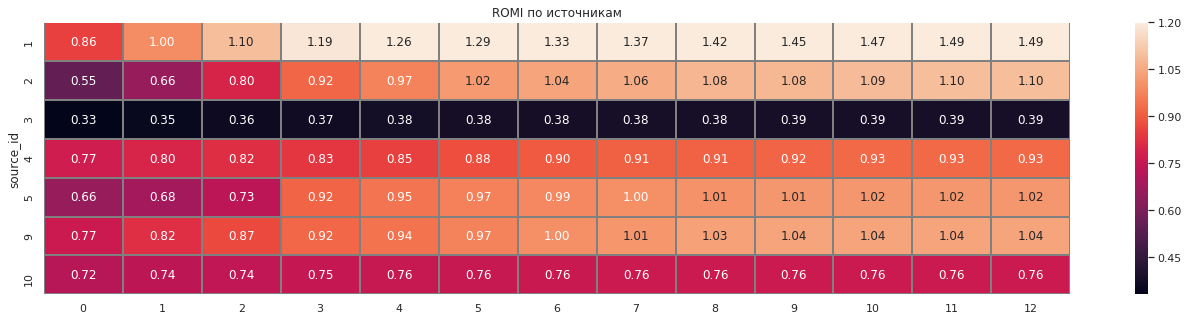

In [ ]:
sns.set(style='white')
plt.figure(figsize=(23, 5))
plt.title('ROMI по источникам')
sns.heatmap(romi_source, annot=True, fmt='.2f', linewidths=1, linecolor='gray',
           vmax=1.2);

In [ ]:
# считаем ROMI по когортам
romi = ltv.merge(cac[['cac']], on = 'first_buy')
romi = romi.div(romi['cac'], axis = 0).drop(columns = 'cac')

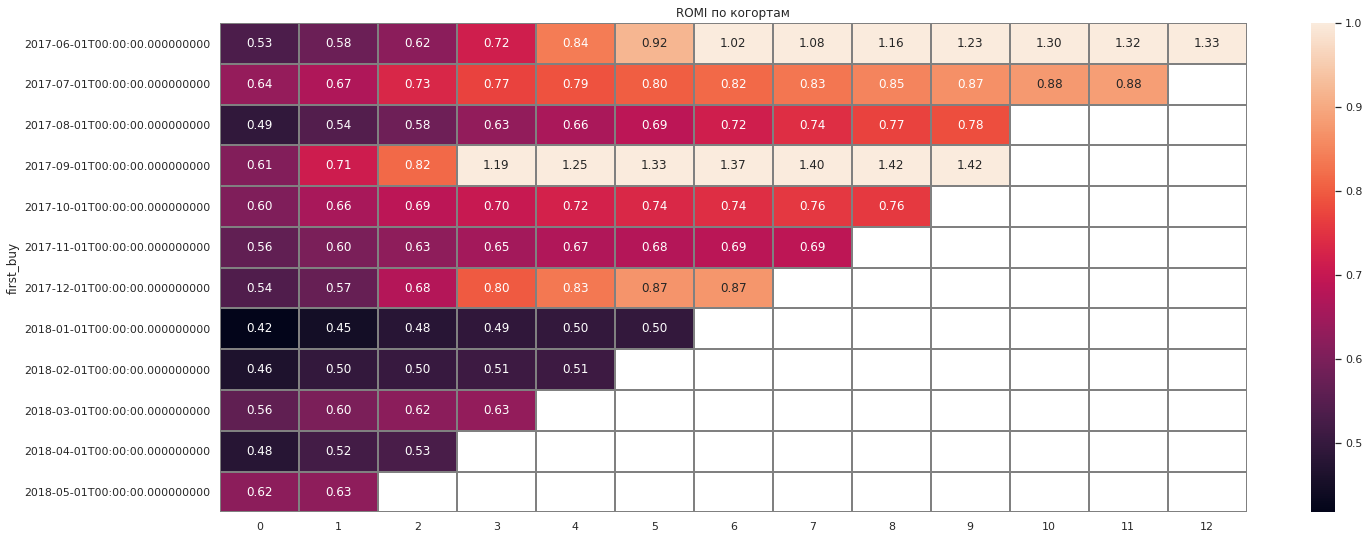

In [ ]:
sns.set(style='white')
plt.figure(figsize=(23, 9))
plt.title('ROMI по когортам')
sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray',
           vmax=1);

In [ ]:
romi.mean(axis=0)

0     0.543728
1     0.585236
2     0.625217
3     0.710089
4     0.753550
5     0.815416
6     0.889023
7     0.917756
8     0.992645
9     1.077065
10    1.088404
11    1.103901
12    1.333982
dtype: float64

In [ ]:
romi.mean(axis=1)

first_buy
2017-06-01    0.974260
2017-07-01    0.794031
2017-08-01    0.661251
2017-09-01    1.152341
2017-10-01    0.708499
2017-11-01    0.645409
2017-12-01    0.737987
2018-01-01    0.472124
2018-02-01    0.497247
2018-03-01    0.604511
2018-04-01    0.509635
2018-05-01    0.624814
dtype: float64

- Быстрее всего на окупаемость выходит первый источник трафика, уже на второй месяц. Далее следует второй источник, он выходит на окупаемость к пятому месяцу. Далее следуют пятый и девятый источники - 6 месяц. Остальные источники трафика не выходят на окупаемость. Хуже всего показывает себя третий источник трафика: ROMI к 12 месяцу равен 0.39

- Быстрее всего вышли на окупаемость июньская и сентябрьская когорты. Все остальные когорты - убыточны.

## Шаг 3. Выводы и рекомендации

#### 3.1. Источники трафика и тип устройств, на которые маркетологам стоит делать упор. 

Наиболее эффективные источники трафика: 1 и 2. Они быстрее всех выходят на окупаемость: порядка 3-5 месяцев. У первого: относительно низкий средний CAC (7) и высокий LTV (11). А вот у второго есть небольшая проблема: у него очень высокий LTV (13), но при этом CAC не сильно отстает (12.2). И если мы снизим маржинальность со 100% до реального значения, то скорее всего ROMI по нему будет отрицательным :( А на первый источник трафика тратится крайне мало средств и при увеличении бюджета ситуиция может измениться, и возможно не в лучшую сторону :)

Также возможно стоит поэкспериментировать с бюджетом на 5-й и 9-й источники трафика. К 6-7-ому месяцу они достигают окупаемости. На 9-й источник трафика тратится не так много средств, и возможно, если увеличить бюджет на него, то ситуация может измениться в лучшую сторону. Однако опять же, если мы снизим маржинальность до реальных значений, то скорее всего эти источники трафика также будут убыточными.

Однозначно стоит убрать 3-й источник трафика: на него идут наибольшие затраты, но по нему наименьшая окупаемость (ROMI = 0.39)

Что касается устройств, то здесь явно нужно сделать больший упор на десктопные устройства. В пользу данной позиции говорят следующие факты:

- LTV по декстопам за 12 месяцев = 7.2, а по мобильным = 5.6. Разница почти в 25%, что весьма ощутимо.
- Среди всех посетителей сайта доля пользователей мобильных устройств составляет 30%. В то время как среди покупателей - доля мобильных лишь 20%. 
- Retention rate у пользователей с мобильных в среднем на 10% ниже, чем у пользователей с десктопных устройств.

#### 3.2. Выводы после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;


Продуктовые метрики:

- Средняя выручка с одного клиента = 6.9 у.е., при среднем чеке в 5 у.е. Возможно, стоит сделать больший упор на уже имеющихся клиентов, активнее их прорабатывать в ретаргете, например. Ибо в текущий момент большая часть клиентов после совершения покупки теряется. 

- Среднее количество посещений на одного пользователя равно 1.57. Это еще один довод в пользу того, что нужно активнее прорабатывать тех, кто уже покупал билеты или просто контактировал с сервисом. Особенно учитывая, что ниша мероприятий явно не относится к разряду тех ниш, где покупки совершаются раз в год, а то и реже. 

- Средняя продолжительность сессии составляет почти 11 минут. Однако средняя продолжительность сессии у тех, кто совершил хотя бы одну покупку - этот показатель значительно выше и составляет 16 минут. Можно сделать вывод, что продолжительность сессии влияет на покупку товара клиентом. Либо можно сделать иной вывод: интерфейс покупки билета настолько не удобен, что это увеличивает почти на треть продолжительность сессии. И это только у тех, кто купил. А ведь есть и те, кто так и не смог пробраться сквозь эти тернии и ушел без билета. Но это онли гипотеза :)

- RR на декстопных устройствах в среднем выше, чем на смартфонах/планшетах, как уже говорил выше. Плюс заметна явная негативная динамика. В каждой новой когорте показатели RR доходят до отмеки ниже 5% быстрее и быстрее. Так если первые когорты продерживались хотя бы 4-5 месяцев, то последние когорты едва ли продерживаются больше месяца. Учитывая, что распределение трат по источникам трафика +- всегда оставалось постоянным, то можно сделать вывод, что проблема таится где-то еще...

Метрики электронной коммерции:

- В среднем с первого посещения сайта до совершения покупки проходит порядка 159 минут, однако в данном случае правильнее было бы ориентироваться по медиане, где показатель = 12 минутам. Исходя из этого можно сделать вывод, что большая часть покупок происходит в первый же визит.

- В среднем за 6 месяцев на одного клиента приходится 1.17 покупки. Это мало и опять же означает, что большая часть клиентов после совершения первой покупки - теряется из внимания. К 12 месяцу показатель растет, но лишь до 1.38.

- Средняя выручка с одного пользователя равны 6.9 у.е. В среднем такую выручку приносит пользователь к 3-4 месяцу после первой покупки. А учитывая, что средняя стоимость привлечения клиента равна 9 у.е., то можно говорить о некоторых проблемах. Впрочем, об этом чуть дальше - в итогах когортного анализа.

Метрики маркетинга:

- Наибольшие траты приходятся на декабрь, ноябрь и октябрь. Меньше всего расходуется рекламного бюджета в летние месяцы. Однако именно у летних когорт высокий показатель LTV, думаю на это стоит обратить внимание.

- По остальным моментам более подробный анализ в пункте 3.1 и в пункте 3.3

#### 3.3. Итоги когортного анализа. Самые перспективные для компании когорты клиентов;


- Самые эффективные когорты: 2017-06 и и 2017-09 - так как они уже вышли на окупаемость, ROMI равен 1.33 и 1.42 соответственно.

- Самые перспективные когорты: 2017-12 и 2017-07 - вероятнее всего они тоже выйдут на окупаемость, хотя бы к 12 месяцу. У них средние показатели LTV. У 2017-12 один из самых низких показателей CAC. 

В целом, все остальные когорты выглядят убыточными. Все когорты начиная с 2018-01 находятся в плачевном состоянии (если судить по LTV и ROMI), и с каждой новой когортой ситуация только ухудшается. Возможно, как гипотеза, сказывается сезонность, но опять же - ввиду ограниченности периода, за которой предоставлены данные - проверить это нельзя :)



#### 3.4. Как различаются метрики в разрезе устройств.

- LTV по декстопам за 12 месяцев = 7.2, а по мобильным = 5.6. Разница почти в 25%, что весьма ощутимо.
- Среди всех посетителей сайта доля пользователей мобильных устройств составляет 30%. В то время как среди покупателей - доля мобильных лишь 20%. 
- Retention rate у пользователей с мобильных в среднем на 10% ниже, чем у пользователей с десктопных устройств.

### Общие рекомендации

- Сделать больший акцент в рекламных кампаниях на тех клиентов, кто уже покупал билеты через сервис. 
- Сделать больший упор на декстопные устройства. 
- Оптимизировать функционал сервиса, дабы приобретение билетов стало проще и занимало меньше времени.

- Отказаться от третьего источника трафика. Сделать больший упор на первый и второй источники трафика. Обратить внимание на пятый и девятый.
- Подумать об увеличения рекламного бюджета в летние месяцы.